In [65]:
import pandas as pd


In [66]:

df = pd.read_csv('Houses_Sales_Prices.csv')

In [67]:
df.dtypes

Local Government District    object
Electoral Ward (2014)        object
Sale Year                     int64
No. of Verified Sales         int64
Minimum Sale Price           object
Lower Quartile Sale Price    object
Median Sale Price            object
Simple Mean Sale Price       object
Upper Quartile Sale Price    object
Maximum Sale Price           object
dtype: object

Since many columns have data type as object so missing values can't be judged from below code

In [68]:
df.isnull().sum()

Local Government District    0
Electoral Ward (2014)        0
Sale Year                    0
No. of Verified Sales        0
Minimum Sale Price           0
Lower Quartile Sale Price    0
Median Sale Price            0
Simple Mean Sale Price       0
Upper Quartile Sale Price    0
Maximum Sale Price           0
dtype: int64

Certain outliers are seen below

In [69]:
df.describe()

,Sale Year,No. of Verified Sales
count,560.000000,560.000000
mean,2011.500000,46.428571
std,4.034733,27.379175
min,2005.000000,5.000000
25%,2008.000000,27.000000
50%,2011.500000,41.000000
75%,2015.000000,59.000000
max,2018.000000,193.000000


In [78]:

#df1 = df.replace('.', '0')
#for col in df1.iloc[:,2:].columns:
#  if df1[col].dtypes == 'O':
#    df1[col] = df1[col].astype(int)
df1 = df.drop(columns=['Local Government District','Sale Year'], axis=1)


In [79]:
import pandas as pd

# Identify columns with object data type
object_cols = df1.select_dtypes(include='object').columns

# Replace '.' with NaN in object columns
df1[object_cols] = df1[object_cols].replace('.', pd.NA)

# Convert object columns to integers
for col in object_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce', downcast='integer')

df1 = df1.drop(columns=['Electoral Ward (2014)'], axis=1)
df1['Electoral Ward (2014)']=df['Electoral Ward (2014)']

In [80]:
df1.head()

,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price,Electoral Ward (2014)
0,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0,Abbey
1,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0,Abbey
2,57,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0,Abbey
3,31,NaN,NaN,NaN,NaN,NaN,NaN,Abbey
4,22,NaN,NaN,NaN,NaN,NaN,NaN,Abbey


In [81]:
df1.isnull().sum()

No. of Verified Sales          0
Minimum Sale Price           207
Lower Quartile Sale Price    207
Median Sale Price            207
Simple Mean Sale Price       207
Upper Quartile Sale Price    207
Maximum Sale Price           207
Electoral Ward (2014)          0
dtype: int64

<ipython-input-82-6d16ff0c7a40>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


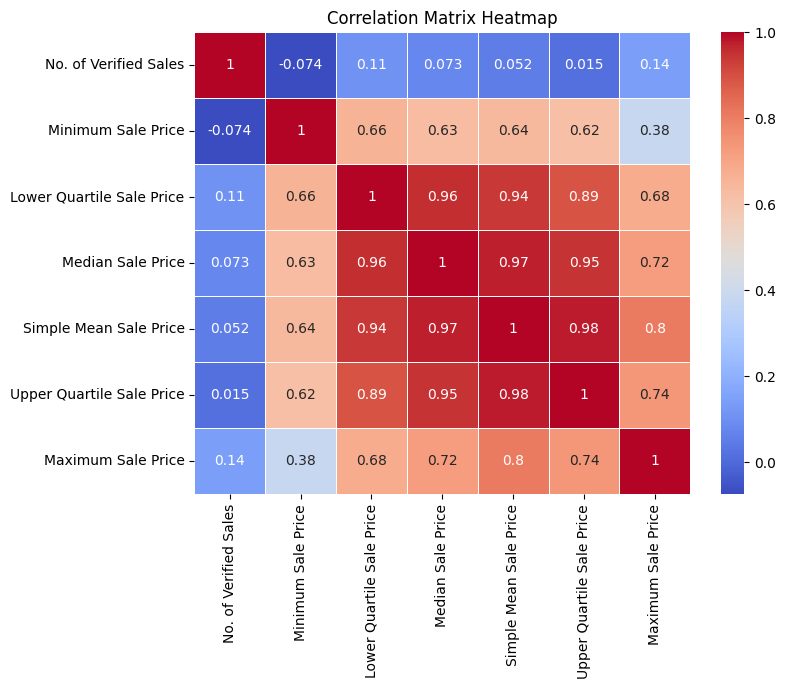

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the above heat map we find that there's poor relationship of Sale Year with almost all the other features. Hence, we can drop this column. Also we'll drop 'Local Government District' as it is same for all the samples.

In [83]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical data
df1['ElectoralWard_encoded'] = label_encoder.fit_transform(df1['Electoral Ward (2014)'])
df1=df1.drop(columns=['Electoral Ward (2014)'])

In [84]:
df1.head()

,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price,ElectoralWard_encoded
0,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0,0
1,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0,0
2,57,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0,0
3,31,NaN,NaN,NaN,NaN,NaN,NaN,0
4,22,NaN,NaN,NaN,NaN,NaN,NaN,0


Imputing missing values with median of the data

In [85]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)


In [86]:
df_imputed.head()

,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price,ElectoralWard_encoded
0,85.0,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0,0.0
1,120.0,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0,0.0
2,57.0,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0,0.0
3,31.0,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0,0.0
4,22.0,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0,0.0


Visualizing distribution of Target Variable

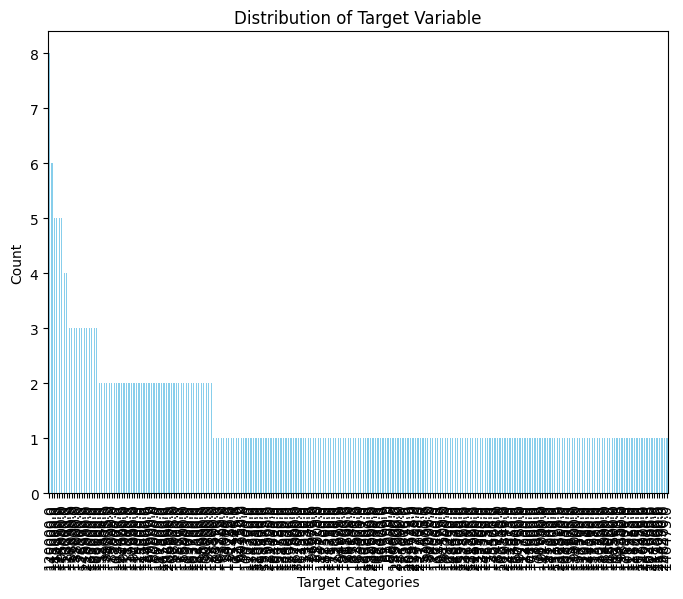

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

target_column = 'Median Sale Price'

# Plotting the histogram
plt.figure(figsize=(8, 6))
df1[target_column].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.show()

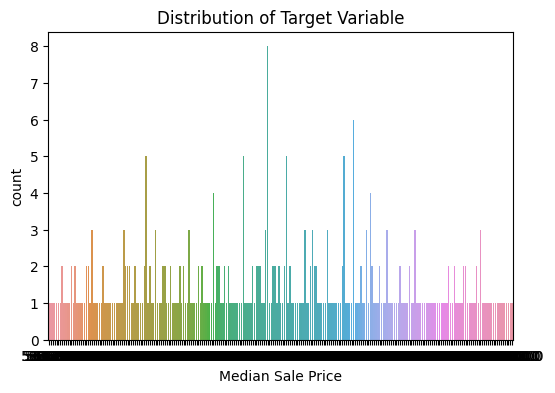

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Median Sale Price', data=df1)
plt.title('Distribution of Target Variable')
plt.show()

Visualizing Skewness for target feature

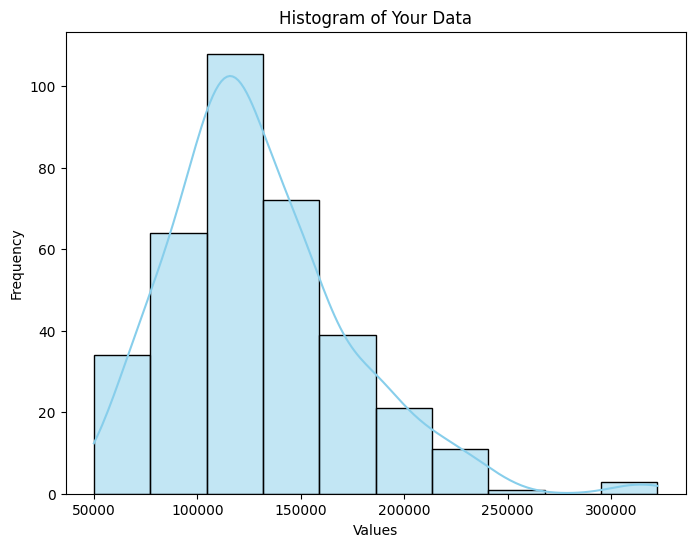

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df1['Median Sale Price'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Your Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


If I try removing outliers, some of the important data is removed and accuracy decreases. Hence, commenting this code.


In [90]:
'''
import pandas as pd
import numpy as np

# Function to identify and manipulate outliers using Z-score
def handle_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers_mask = z_scores > z_threshold
        df[column][outliers_mask] = np.nan  # Replace outliers with NaN

# Specify columns to handle outliers
columns_to_handle_outliers = ['Minimum Sale Price', 'Lower Quartile Sale Price', 'Simple Mean Sale Price', 'Upper Quartile Sale Price', 'Maximum Sale Price']

# Handle outliers using Z-score method
handle_outliers_zscore(df_imputed, columns_to_handle_outliers)
df_imputed.fillna(df_imputed.median(), inplace=True)

'''

"\nimport pandas as pd\nimport numpy as np\n\n# Function to identify and manipulate outliers using Z-score\ndef handle_outliers_zscore(df, columns, z_threshold=3):\n    for column in columns:\n        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())\n        outliers_mask = z_scores > z_threshold\n        df[column][outliers_mask] = np.nan  # Replace outliers with NaN\n\n# Specify columns to handle outliers\ncolumns_to_handle_outliers = ['Minimum Sale Price', 'Lower Quartile Sale Price', 'Simple Mean Sale Price', 'Upper Quartile Sale Price', 'Maximum Sale Price']\n\n# Handle outliers using Z-score method\nhandle_outliers_zscore(df_imputed, columns_to_handle_outliers)\ndf_imputed.fillna(df_imputed.median(), inplace=True)\n\n"

### Linear Regression Model

Choosing the best params using GridSearchCV


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df=df_imputed

# Assuming 'df' is your DataFrame and 'target_variable' is your target variable
target_variable = 'Median Sale Price'

# Split the data into features (X) and target variable (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Create a linear regression model with a pipeline (including scaling)
model = make_pipeline(StandardScaler(), LinearRegression())

# Define the hyperparameters and their possible values
param_grid = {
    'linearregression__fit_intercept': [True, False]
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)



Best Hyperparameters: {'linearregression__fit_intercept': True}


Cross Validating

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

df=df_imputed

target_variable = 'Median Sale Price'

# Split the data into features (X) and target variable (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Create a linear regression model with a pipeline (including scaling)
model = make_pipeline(StandardScaler(), LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_scores_positive = -cv_scores

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores_positive)

# Calculate and print the mean and standard deviation of cross-validation scores
print("Mean CV Score:", cv_scores_positive.mean())
print("Standard Deviation of CV Scores:", cv_scores_positive.std())


Cross-validation Scores: [48304867.96699393 40040503.62844765 25150300.95566526 78458764.94171202
 42878715.85353114]
Mean CV Score: 46966630.66927
Standard Deviation of CV Scores: 17516734.430809855


Choosing the feature set and target vector

In [92]:
X = df_imputed[['ElectoralWard_encoded', 'Minimum Sale Price', 'Lower Quartile Sale Price', 'Simple Mean Sale Price', 'Upper Quartile Sale Price', 'Maximum Sale Price']]
y = df_imputed['Median Sale Price']

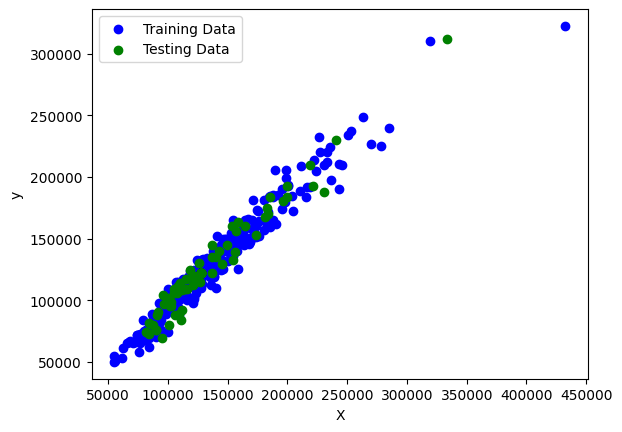

In [93]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression(fit_intercept=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Plot the training data and the regression line
plt.scatter(X_train['Simple Mean Sale Price'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['Simple Mean Sale Price'], y_test, color='green', label='Testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [94]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.9700723401294782


Gradient Boosting Model

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)

# Calculate and print the evaluation metric (e.g., mean squared error)
mse = mean_squared_error(y_test, y_pred)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


Mean Squared Error: 40439026.56899344
R-squared: 0.963520356640347


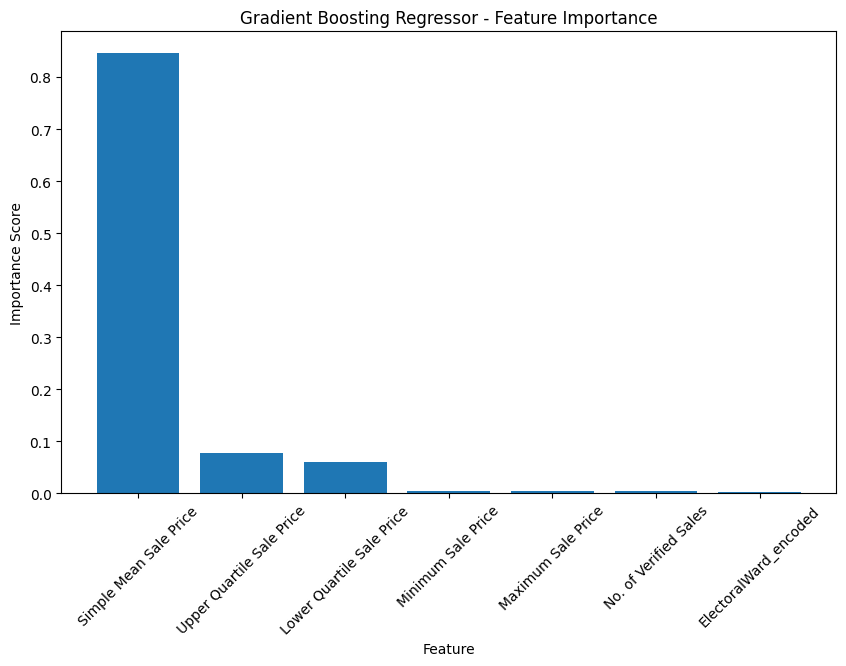

In [96]:
# Creating Model
from sklearn.ensemble import GradientBoostingRegressor
#model = GradientBoostingRegressor(n_estimators=100)
model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, n_estimators=150)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), features[sorted_idx], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()

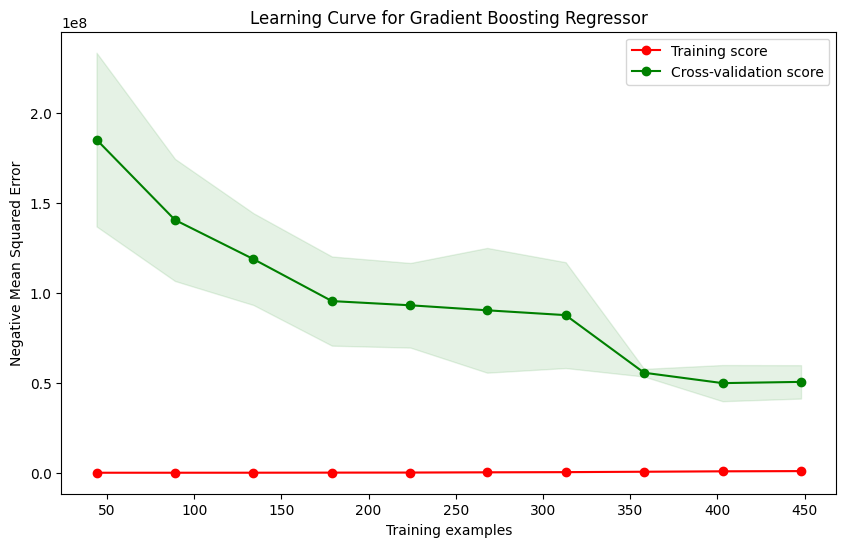

In [97]:
from sklearn.model_selection import learning_curve

df=df_imputed

target_variable = 'Median Sale Price'

# Split the data into features (X) and target variable (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Create learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Gradient Boosting Regressor")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


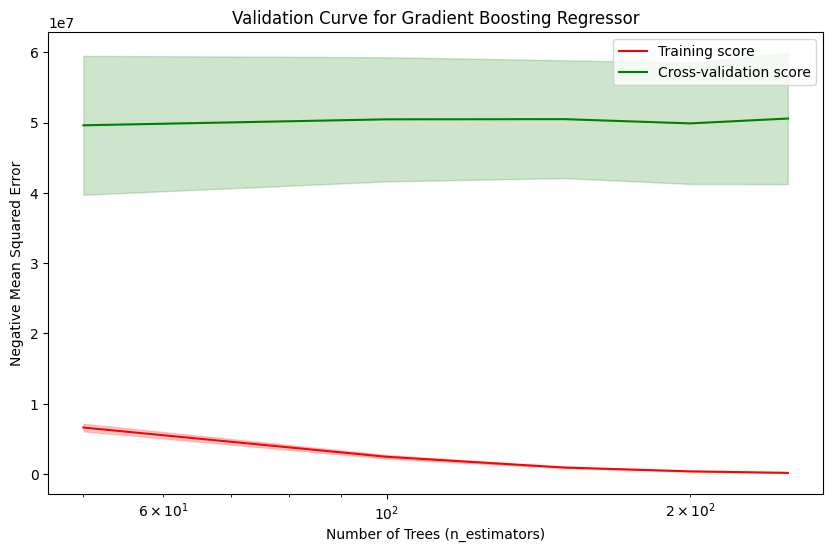

In [98]:
from sklearn.model_selection import validation_curve

df=df_imputed

target_variable = 'Median Sale Price'

# Split the data into features (X) and target variable (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Define a range of values for the hyperparameter (e.g., n_estimators)
param_range = [50, 100, 150, 200, 250]

# Create validation curve
train_scores, test_scores = validation_curve(
    model, X, y, param_name="n_estimators", param_range=param_range, cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Gradient Boosting Regressor")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Negative Mean Squared Error")
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()


KNN Regressor Model

In [99]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.8884277193931618


SVR Model


In [100]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Support Vector Regressor model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

2.6188196226552824e+16
R-squared: -23624110.152808033


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Lasso Model

In [101]:
from sklearn.linear_model import Lasso

# Create and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

34194669.46059807
R-squared: 0.9691533290348714


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.502e+09, tolerance: 5.424e+07
  model = cd_fast.enet_coordinate_descent(


Ridge Model

In [102]:
from sklearn.linear_model import Ridge

# Create and train the Ridge Regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

34194684.31174519
R-squared: 0.9691533156377994


ElasticNet Model

In [103]:
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet Regression model
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)
y_pred = elasticnet_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

34194502.43066309
R-squared: 0.9691534797109131


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.812e+09, tolerance: 5.424e+07
  model = cd_fast.enet_coordinate_descent(


Learning Curve for Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+07, tolerance: 6.797e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+08, tolerance: 6.122e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+08, tolerance: 1.448e

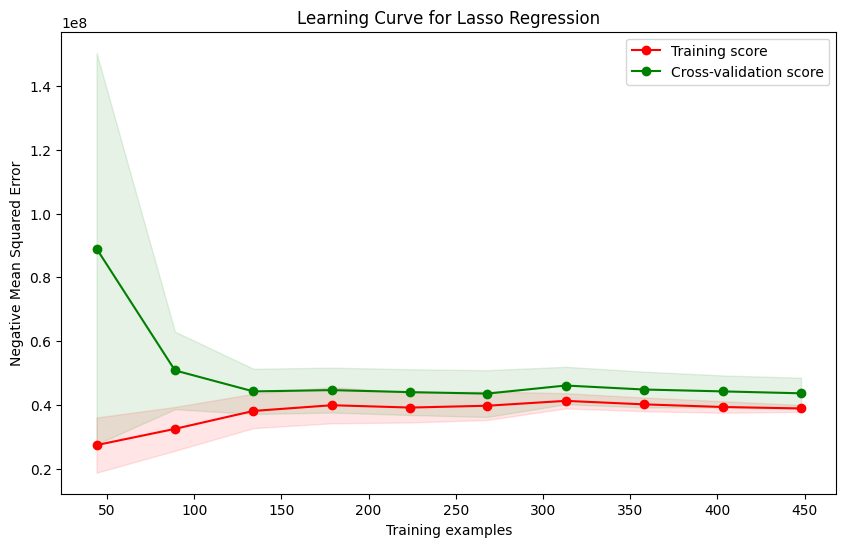

In [104]:
from sklearn.model_selection import ShuffleSplit

# Standardize features for Lasso regression
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Set up a learning curve with 5-fold cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    lasso_model, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curve for Lasso Regression")
plt.legend(loc="best")
plt.show()


Validation Curve for Lasso



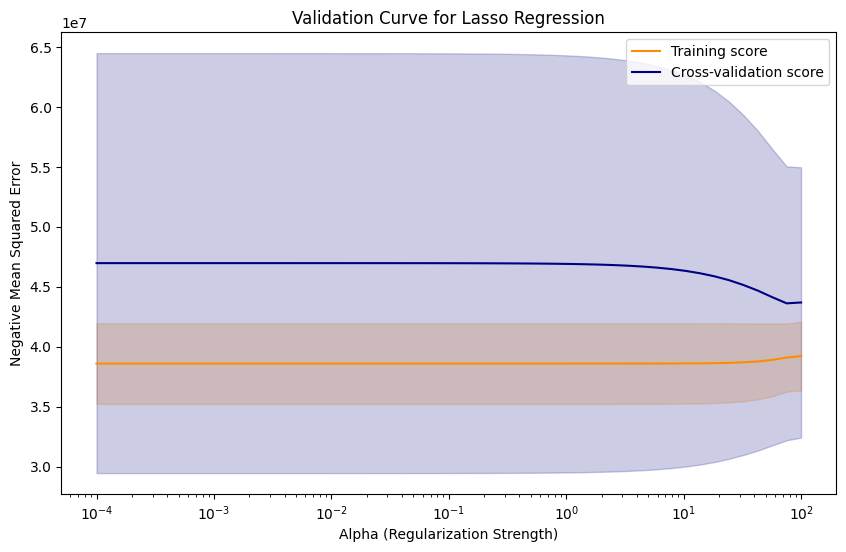

In [105]:
from sklearn.model_selection import validation_curve

# Standardize features for Lasso regression
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a range of alpha values to test
alphas = np.logspace(-4, 2, 50)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Generate training and test scores across different alpha values
train_scores, test_scores = validation_curve(
    lasso_model, X, y, param_name="alpha", param_range=alphas,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(alphas, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
plt.semilogx(alphas, test_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(alphas, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve for Lasso Regression")
plt.legend(loc="best")
plt.show()


For all the above models tried, though many models gave similar accuracy but learning curve and validation curve of Lasso Model helped justifying the accuracy rate. Hence, amongst all, Lasoo model performace should be choosen.